#La Liga player stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

## Loading data from CSV files

In [ ]:
adgk = pd.read_csv("/content/drive/MyDrive/AI_projects/LaLiga_players/laliga_2021_advancedgoalkeeping_fbref.csv")
gk = pd.read_csv("/content/drive/MyDrive/AI_projects/LaLiga_players/laliga_2021_goalkeeping_fbref.csv")

## Preparing the dataset

First we must eliminate the final column termed Matches which is derived from the fbref GUI but does not contain any useful data. It actually is a column that contains the word Matches for every row. In the fbref page it is a hyperlink that takes the user to a page where each player's stats are broken down match per match.

In [ ]:
adgk.drop('Matches', axis='columns', inplace=True)
gk.drop('Matches', axis='columns', inplace=True)

For some reason fbref provides player names in a bipartite way with the formal name and a more standardized name separated by a backslash. The following is an example:


> Rubén Yáñez\Ruben-Yanez


Just for ease of handle we are going to remove the formal name and keep only the standardized name.

In [ ]:
def name_editor(name):
  for i in range(len(name)):
    if name[i] == "\\":
      new_name = name[i+1:]
      break
  return new_name

for i in range(len(adgk)):
    name = name_editor(adgk.Player[i])
    adgk.at[i, "Player"] = name

for i in range(len(gk)):
    name = name_editor(gk.Player[i])
    gk.at[i, "Player"] = name

Finally, we show a few rows from each dataset to confirm that we have prepared the dataset correctly.

In [ ]:
gk.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1
0,1,Angel,es ESP,GK,Granada,18-331,2002,1,1,90,1.0,2,2.00,7,6,85.7,0,0,1,0,0.0,2,1,1,0,50.0
1,2,Sergio-Asenjo,es ESP,GK,Villarreal,31-325,1989,36,36,3240,36.0,41,1.14,115,84,70.4,15,13,8,10,27.8,9,7,1,1,12.5
2,3,Edgar-Badia,es ESP,GK,Elche,29-096,1992,30,30,2700,30.0,46,1.53,135,93,69.6,5,11,14,5,16.7,9,5,3,1,37.5
3,4,Ruben-Blanco,es ESP,GK,Celta Vigo,25-298,1995,19,19,1637,18.2,27,1.48,60,34,56.7,7,6,6,4,21.1,1,1,0,0,0.0
4,5,Yassine-Bounou,ma MAR,GK,Sevilla,30-044,1991,33,33,2970,33.0,28,0.85,100,78,76.0,21,5,7,15,45.5,6,4,2,0,33.3


In [ ]:
adgk.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,GA,PKA,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att.1,Thr,Launch%,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Angel,es ESP,GK,Granada,18-331,2002,1.0,2,1,0,1,0,2.7,0.22,0.7,0.69,10,24,41.7,13,0,76.9,50.1,17,82.4,55.0,10,0,0.0,1,1.00,14.3
1,2,Sergio-Asenjo,es ESP,GK,Villarreal,31-325,1989,36.0,41,7,0,4,2,35.2,0.25,-2.8,-0.08,210,462,45.5,1022,189,31.3,33.7,285,49.8,43.1,427,42,9.8,21,0.58,13.8
2,3,Edgar-Badia,es ESP,GK,Elche,29-096,1992,30.0,46,5,0,5,0,45.6,0.30,-0.4,-0.01,262,518,50.6,864,143,39.5,35.9,283,62.5,43.3,302,23,7.6,20,0.67,13.3
3,4,Ruben-Blanco,es ESP,GK,Celta Vigo,25-298,1995,18.2,27,1,1,2,0,22.8,0.37,-4.2,-0.23,111,298,37.2,520,81,40.2,36.2,144,61.8,46.3,149,9,6.0,12,0.66,14.9
4,5,Yassine-Bounou,ma MAR,GK,Sevilla,30-044,1991,33.0,28,4,0,4,2,26.0,0.22,0.0,0.00,199,419,47.5,897,141,34.0,35.0,199,57.3,44.2,284,32,11.3,23,0.70,15.6


## Shot-stopping performance as measured by PSxG+/- p90
Post-shot expected goals (PSxG) are a measure of how good are the shots on target that a keeper receives. They take into account factors that appear after the shot has been taken such as speed and placement. This is different from expected goals (xG) which measure the chance of scoring from a shot before it is taken (place of shooting, defender positions, quality of pass...). Expected goals serve to measure the shooter where as PSxG measure the keeper. The need for this difference might be best illustrated by an example:


> A shot from 30 yards out is very low xG for the shooter. Only a small percentage of those shots end up as goals so the shooter is not expected to score. By contrast if the shooter manages to send a screamer into the top corner the PSxG of the shot rises because it is now very likely that the shot ends up as a goal as it is very difficult to stop. As such the keeper is not expected to save it.

Using PSxG we can get an approximation of how good or lucky a keeper is. If we subtract from his PSxG faced the number of goals conceded/against (GA) we will get an estimate of how many goals the keeper has saved or let in compared with what would be expected. This is PSxG +/-. A positive number means the keeper has saved more than expected and a negative number means he has let in more than expected. We average this value per 90 to provide a fair assesment of all goalkeepers regardless of the number of minutes they have played.





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


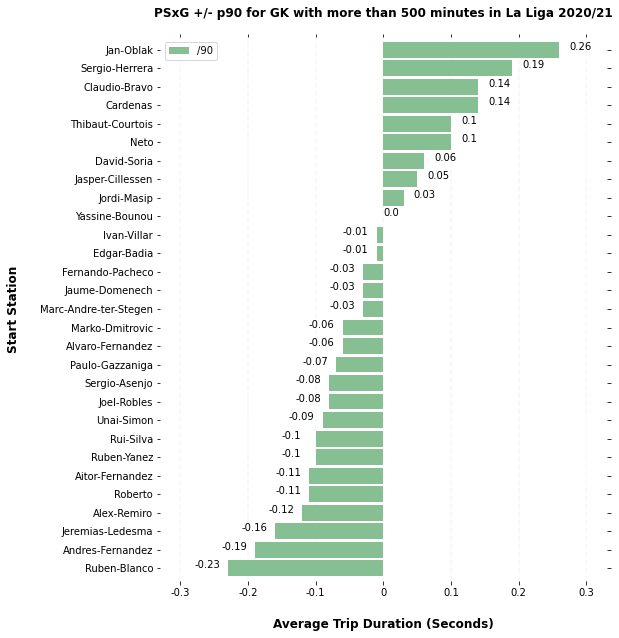

In [ ]:
adgk_filt = adgk[adgk["90s"]>500/90]
adgk_filt.sort_values(["/90"], ascending = True, inplace = True)
ax = adgk_filt.plot(kind='barh', x = "Player", y = "/90", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set title label
ax.set_title("PSxG +/- p90 for GK with more than 500 minutes in La Liga 2020/21", pad = 20, weight='bold', size=12)

# Set x-axis label
ax.set_xlabel("Average Trip Duration (Seconds)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Start Station", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Annotate the bars
for y, x in enumerate(adgk_filt['/90']):
  if x > 0:
    ax.annotate(str(x), xy=(x + 0.015, y))
  elif x == 0:
    ax.annotate(str(x), xy=(x, y))
  elif x < 0:
    ax.annotate(str(x), xy=(x - 0.05, y))